<a href="https://colab.research.google.com/github/Swapn2/PyTorch/blob/main/RNN_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd

In [112]:
df = pd.read_csv('/content/100_Unique_QA_Dataset.csv')

In [113]:
df.head()

,question,answer
0,What is the capital of France?,Paris
1,What is the capital of Germany?,Berlin
2,Who wrote 'To Kill a Mockingbird'?,Harper-Lee
3,What is the largest planet in our solar system?,Jupiter
4,What is the boiling point of water in Celsius?,100


In [114]:
# tokenize
def tokenize(text):
  text = text.lower()
  text = text.replace('?','')
  text = text.replace("'",'')
  return text.split()

In [115]:
# # vocab
# vocab = {'UNK' : 0} # if in future user ask something which is not in dictionary the we will use this token

# def build_vocab(row):
#   print(row['question'] ,row['answer'])

In [116]:
# df.apply(build_vocab,axis = 1)

In [117]:
# # vocab
# vocab = {'UNK' : 0} # if in future user ask something which is not in dictionary the we will use this token

# def build_vocab(row):
#   tokenized_question = tokenize(row['question'])
#   tokenized_answer = tokenize(row['answer'])
#   print(tokenized_question , tokenized_answer)

# df.apply(build_vocab,axis = 1)

In [118]:
# vocab
vocab = {'UNK' : 0} # if in future user ask something which is not in dictionary the we will use this token

def build_vocab(row):
  tokenized_question = tokenize(row['question'])
  tokenized_answer = tokenize(row['answer'])
  merge_toke = tokenized_question + tokenized_answer
  for token in merge_toke:
    if token not in vocab:
      vocab[token] = len(vocab)

df.apply(build_vocab,axis = 1)
print(vocab)

{'UNK': 0, 'what': 1, 'is': 2, 'the': 3, 'capital': 4, 'of': 5, 'france': 6, 'paris': 7, 'germany': 8, 'berlin': 9, 'who': 10, 'wrote': 11, 'to': 12, 'kill': 13, 'a': 14, 'mockingbird': 15, 'harper-lee': 16, 'largest': 17, 'planet': 18, 'in': 19, 'our': 20, 'solar': 21, 'system': 22, 'jupiter': 23, 'boiling': 24, 'point': 25, 'water': 26, 'celsius': 27, '100': 28, 'painted': 29, 'mona': 30, 'lisa': 31, 'leonardo-da-vinci': 32, 'square': 33, 'root': 34, '64': 35, '8': 36, 'chemical': 37, 'symbol': 38, 'for': 39, 'gold': 40, 'au': 41, 'which': 42, 'year': 43, 'did': 44, 'world': 45, 'war': 46, 'ii': 47, 'end': 48, '1945': 49, 'longest': 50, 'river': 51, 'nile': 52, 'japan': 53, 'tokyo': 54, 'developed': 55, 'theory': 56, 'relativity': 57, 'albert-einstein': 58, 'freezing': 59, 'fahrenheit': 60, '32': 61, 'known': 62, 'as': 63, 'red': 64, 'mars': 65, 'author': 66, '1984': 67, 'george-orwell': 68, 'currency': 69, 'united': 70, 'kingdom': 71, 'pound': 72, 'india': 73, 'delhi': 74, 'discover

In [119]:
vocab

{'UNK': 0,
 'what': 1,
 'is': 2,
 'the': 3,
 'capital': 4,
 'of': 5,
 'france': 6,
 'paris': 7,
 'germany': 8,
 'berlin': 9,
 'who': 10,
 'wrote': 11,
 'to': 12,
 'kill': 13,
 'a': 14,
 'mockingbird': 15,
 'harper-lee': 16,
 'largest': 17,
 'planet': 18,
 'in': 19,
 'our': 20,
 'solar': 21,
 'system': 22,
 'jupiter': 23,
 'boiling': 24,
 'point': 25,
 'water': 26,
 'celsius': 27,
 '100': 28,
 'painted': 29,
 'mona': 30,
 'lisa': 31,
 'leonardo-da-vinci': 32,
 'square': 33,
 'root': 34,
 '64': 35,
 '8': 36,
 'chemical': 37,
 'symbol': 38,
 'for': 39,
 'gold': 40,
 'au': 41,
 'which': 42,
 'year': 43,
 'did': 44,
 'world': 45,
 'war': 46,
 'ii': 47,
 'end': 48,
 '1945': 49,
 'longest': 50,
 'river': 51,
 'nile': 52,
 'japan': 53,
 'tokyo': 54,
 'developed': 55,
 'theory': 56,
 'relativity': 57,
 'albert-einstein': 58,
 'freezing': 59,
 'fahrenheit': 60,
 '32': 61,
 'known': 62,
 'as': 63,
 'red': 64,
 'mars': 65,
 'author': 66,
 '1984': 67,
 'george-orwell': 68,
 'currency': 69,
 'united

In [120]:
# word to numerical indices
def word_to_num(text , vocab):  # here we will give a text in we will use vocan and convert that text to numerical value
   index_text = []
   for token in tokenize(text):
     if token in vocab:
       index_text.append(vocab[token])
     else:
       index_text.append(vocab['UNK'])
   return index_text


In [121]:
word_to_num('what is your name',vocab)

[1, 2, 0, 0]

In [122]:
# now we will move towards make out numerical form dataset

import torch
from torch.utils.data import Dataset , DataLoader

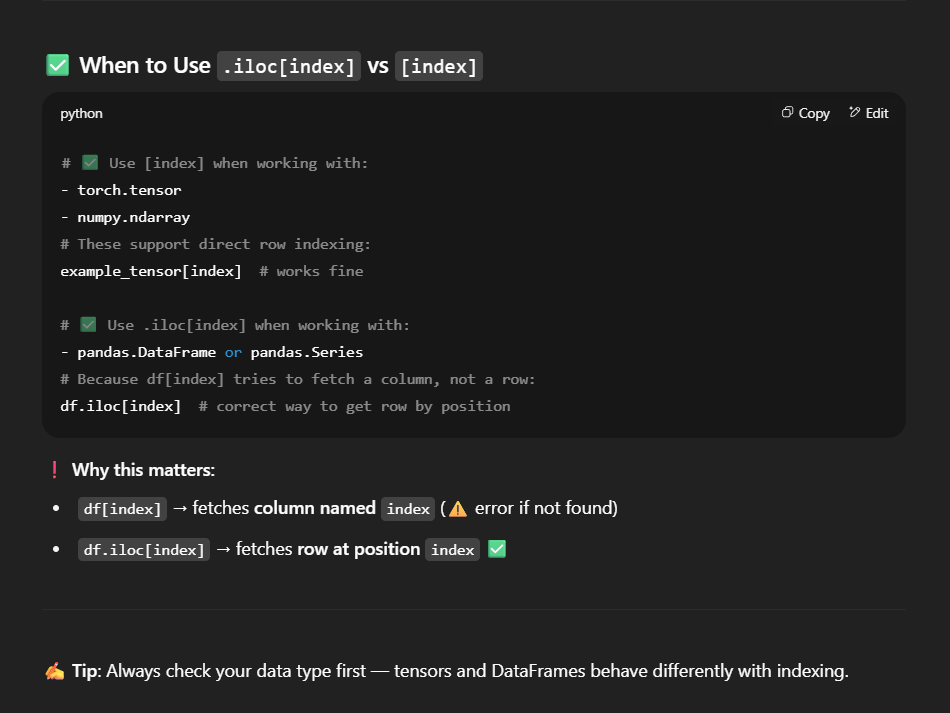

In [123]:
class QADataset(Dataset):
  def __init__(self , df , vocab): # here we are textual dataframe ans vocab
    self.df = df
    self.vocab = vocab

  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self, index):
    numerical_question = word_to_num(self.df.iloc[index]['question'],self.vocab)  # we are fetching a row then its question converting into numerical
    numerical_answer = word_to_num(self.df.iloc[index]['answer'], self.vocab)  # we are fetching a row then its answer converting in to numerical vlaue
    return torch.tensor(numerical_question) , torch.tensor(numerical_answer)



In [124]:
dataset = QADataset(df,vocab)

In [125]:
dataset[10]

(tensor([ 1,  2,  3,  4,  5, 53]), tensor([54]))

In [126]:
dataloader = DataLoader(dataset , batch_size= 1 , shuffle= True) # here batch has only 1 row so they is no need of padding but if there were more than more then then we need todo


In [127]:
for question , answer in dataloader:
  print(question,answer)

tensor([[  1,   2,   3, 146,  86,  19, 192, 193]]) tensor([[194]])
tensor([[10, 96,  3, 97]]) tensor([[98]])
tensor([[ 42, 125,   2,  62,  63,   3, 126, 127]]) tensor([[128]])
tensor([[ 42, 101,   2,   3,  17]]) tensor([[102]])
tensor([[ 10,  11, 157, 158, 159]]) tensor([[160]])
tensor([[ 42, 137, 118,   3, 247,   5, 248]]) tensor([[249]])
tensor([[ 42, 137,   2, 226,  12,   3, 227, 228]]) tensor([[155]])
tensor([[ 42, 216, 118, 217, 218,  19,  14, 219,  43]]) tensor([[220]])
tensor([[ 1,  2,  3, 59, 25,  5, 26, 19, 60]]) tensor([[61]])
tensor([[10, 29,  3, 30, 31]]) tensor([[32]])
tensor([[ 42, 107,   2, 108,  19, 109]]) tensor([[110]])
tensor([[  1,   2,   3,   4,   5, 206]]) tensor([[207]])
tensor([[ 78,  79, 150, 151,  14, 152, 153]]) tensor([[154]])
tensor([[ 42, 263, 264,  14, 265, 266, 158, 267]]) tensor([[268]])
tensor([[  1,   2,   3, 163, 164, 165,  83,  84]]) tensor([[166]])
tensor([[ 1,  2,  3, 17, 18, 19, 20, 21, 22]]) tensor([[23]])
tensor([[ 1,  2,  3,  4,  5, 53]]) tens

In [128]:
import torch.nn as nn

In [165]:
class SimpleRNN(nn.Module):
  def __init__(self , vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim = 50) # we cant use Sequential bcoz sequqential assume single output from each layer but
    self.rnn = nn.RNN(50 , 64 )  # this layer gives more than one outputs see below cells
    self.fc = nn.Linear(64, vocab_size)

  def forward(self , question):
    embedded_question = self.embedding(question)
    rnn_output , hidden = self.rnn(embedded_question)
    last_output = rnn_output[:, -1, :]      # shape: [B, 64]
    output = self.fc(last_output)           # shape: [B, vocab_size]

    # output = self.fc(rnn_output)

    return output


In [166]:
dataset[10][0]

tensor([ 1,  2,  3,  4,  5, 53])

In [167]:
x = nn.Embedding(324 , embedding_dim =50)

In [168]:
a = x(dataset[10][0])

In [169]:
x(dataset[10][0]).shape

torch.Size([6, 50])

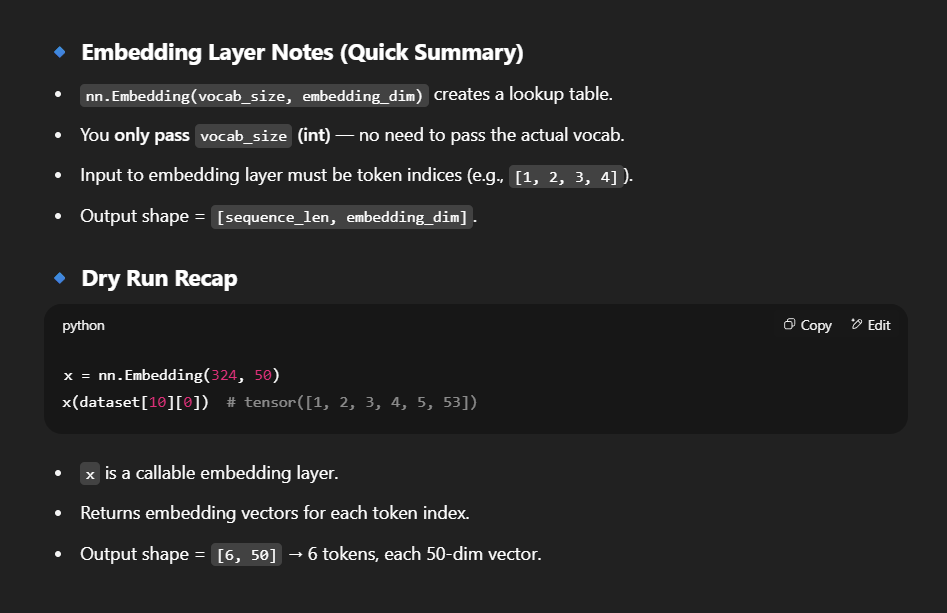

In [170]:
y = nn.RNN(50,64)

In [171]:
y(a).shape

AttributeError: 'tuple' object has no attribute 'shape'

In [172]:
# hidden state (o1, o2,o3,o4 ,o5,o6)
y(a)[0].shape

torch.Size([6, 64])

In [173]:
# final output ( O6)
y(a)[1].shape

torch.Size([1, 64])

In [174]:
b = y(a)[1]

In [175]:
z = nn.Linear(64,324)

In [176]:
z(b).shape

torch.Size([1, 324])

In [177]:
learning_rate = .001
epochs = 20


In [178]:
model = SimpleRNN(len(vocab))

In [179]:
lossfunc = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [185]:
for i in range(epochs):

  total_loss = 0
  for question , answer in dataloader:

    optimizer.zero_grad()
    # print(question.shape)


    # forward
    output = model(question)
    answer = answer.squeeze(1)
    # print(output.shape)
    # print(answer.shape)


    # loss
    loss = lossfunc(output,answer)

    # gradient
    loss.backward()

    #update
    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f'epoch : {i+1} , loss : {total_loss}')


epoch : 1 , loss : 16.158295418485068
epoch : 2 , loss : 16.555443167919293
epoch : 3 , loss : 16.126966039824765
epoch : 4 , loss : 16.452319287403952
epoch : 5 , loss : 16.351808787789196
epoch : 6 , loss : 16.120743272651453
epoch : 7 , loss : 16.204440864850767
epoch : 8 , loss : 16.172981394804083
epoch : 9 , loss : 16.66078573456616
epoch : 10 , loss : 16.09966766773141
epoch : 11 , loss : 16.279978771111928
epoch : 12 , loss : 15.894106680032564
epoch : 13 , loss : 16.246775174862705
epoch : 14 , loss : 16.262394380144542
epoch : 15 , loss : 16.3943065686326
epoch : 16 , loss : 16.442234636255307
epoch : 17 , loss : 15.805449856678024
epoch : 18 , loss : 16.458368347317446
epoch : 19 , loss : 15.908575600071345
epoch : 20 , loss : 16.411358538432978


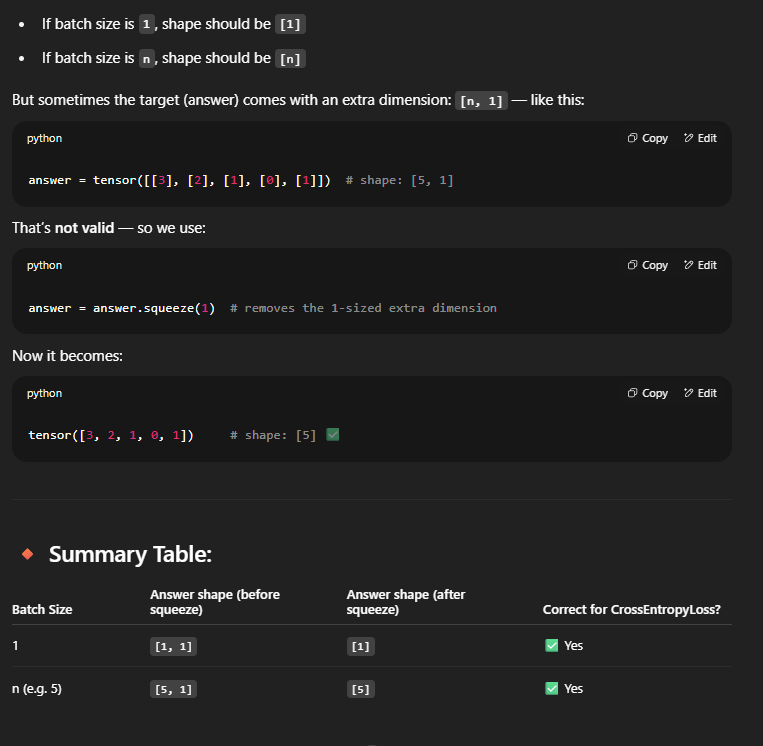

In [188]:
def predict(model, question, threshold=0.5):

  # convert question to numbers
  numerical_question = word_to_num(question, vocab)

  # tensor
  question_tensor = torch.tensor(numerical_question).unsqueeze(0)

  # send to model
  output = model(question_tensor)

  # convert logits to probs
  probs = torch.nn.functional.softmax(output, dim=1)

  # find index of max prob
  value, index = torch.max(probs, dim=1)

  if value < threshold:
    print("I don't know")

  print(list(vocab.keys())[index])

In [189]:
predict(model, "What is the largest planet in our solar system?")

jupiter
